In [1]:
import string, unicodedata
import inflect
def fingerprint(value):
    key = unicodedata.normalize('NFKD', value).encode('ascii','ignore').decode()
    key = set(key.strip().lower().translate(str.maketrans('','',string.punctuation)).split())
    key = ' '.join(sorted(list(key)))
    return key
def plural_to_singular(word):
    p = inflect.engine()
    return p.singular_noun(word)
def singular_to_plural(word):
    p = inflect.engine()
    return p.plural(word)

In [2]:
import csv
endangered_species = []
with open('Species1.csv', mode ='r')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[0] != 'Species':
            endangered_species.append(lines[0])
length = len(endangered_species)
for i in range(length):
    endangered_species[i] = endangered_species[i].lower()
    tmp = plural_to_singular(endangered_species[i])
    if tmp == False:
        endangered_species[i] = [endangered_species[i], singular_to_plural(endangered_species[i])]
    else:
        endangered_species[i] = [tmp, endangered_species[i]]
print(endangered_species)

[['antilocapra americana', 'antilocapra americanas'], ['addax nasomaculatu', 'addax nasomaculatus'], ['bos gauru', 'bos gaurus'], ['bos mutu', 'bos mutus'], ['bos sauveli', 'bos sauvelis'], ['bubalus depressicorni', 'bubalus depressicornis'], ['bubalus mindorensi', 'bubalus mindorensis'], ['bubalus quarlesi', 'bubalus quarlesis'], ['capra falconeri', 'capra falconeris'], ['capricornis milneedwardsii', 'capricornis milneedwardsiis'], ['capricornis rubidu', 'capricornis rubidus'], ['capricornis sumatraensi', 'capricornis sumatraensis'], ['capricornis thar', 'capricornis thars'], ['cephalophus jentinki', 'cephalophus jentinkis'], ['gazella cuvieri', 'gazella cuvieris'], ['gazella leptocero', 'gazella leptoceros'], ['hippotragus niger variani', 'hippotragus niger varianis'], ['naemorhedus baileyi', 'naemorhedus baileyis'], ['naemorhedus caudatu', 'naemorhedus caudatus'], ['naemorhedus goral', 'naemorhedus gorals'], ['naemorhedus griseu', 'naemorhedus griseus'], ['nanger dama', 'nanger dama

In [3]:
product_species = []
product = {}
with open('common_kws.txt') as file:
    temp = ""
    for line in file:
        if line[-1] == '\n':
            line = line[:-1]
        tmp = line.split()
        if len(tmp) == 1:
            product_species.append(line)
            temp = line.lower()
        if len(tmp) > 1:
            if temp in product:
                product[temp].append(tmp[-1])
            else:
                product[temp] = [tmp[-1]]
length = len(product_species)
for i in range(length):
    product_species[i] = product_species[i].lower()
    product_species[i] = [product_species[i], singular_to_plural(product_species[i])]
for i in product:
    length = len(product[i])
    for k in range(length):
        product[i][k] = product[i][k].lower()
        product[i][k] = [product[i][k], singular_to_plural(product[i][k])]
print(product_species)
print(product)

[['cobra', 'cobras'], ['python', 'pythons'], ['boa', 'boas'], ['snake', 'snakes'], ['lizard', 'lizards'], ['varanus', 'varanuses'], ['crocodile', 'crocodiles'], ['alligator', 'alligators'], ['lynx', 'lynxes'], ['monkey', 'monkeys'], ['macaque', 'macaques'], ['lemur', 'lemurs'], ['chimpanzee', 'chimpanzees'], ['gorilla', 'gorillas'], ['otter', 'otters'], ['turtle', 'turtles'], ['tortoise', 'tortoises'], ['owl', 'owls'], ['shark', 'sharks'], ['falcon', 'falcons'], ['eagle', 'eagles'], ['goshawk', 'goshawks'], ['sparrowhawk', 'sparrowhawks'], ['primate', 'primates'], ['bird', 'birds'], ['reptile', 'reptiles'], ['lion', 'lions'], ['cheetah', 'cheetahs'], ['leopard', 'leopards'], ['tiger', 'tigers'], ['ocelot', 'ocelots'], ['bear', 'bears'], ['elephant', 'elephants'], ['rhinoceros', 'rhinoceroses'], ['parrot', 'parrots'], ['macaw', 'macaws'], ['pangolin', 'pangolins'], ['clam', 'clams']]
{'cobra': [['taxidermy', 'taxidermies'], ['scale', 'scales'], ['skin', 'skins'], ['skeleton', 'skeletons

In [4]:
top = []
with open('top10.txt') as file:
    for line in file:
        if line[-1] == '\n':
            line = line[:-1]
        top.append(line)
length = len(top)
for i in range(length):
    top[i] = top[i].lower()
    tmp = plural_to_singular(top[i])
    if tmp == False:
        top[i] = [top[i], singular_to_plural(top[i])]
    else:
        top[i] = [tmp, top[i]]
print(top)

[['struthio camelu', 'struthio camelus'], ['ostrich', 'ostriches'], ['canis lupu', 'canis lupus'], ['wolf', 'wolves'], ['carcharhinus falciformi', 'carcharhinus falciformis'], ['silky shark', 'silky sharks'], ['carcharhinus longimanu', 'carcharhinus longimanus'], ['great white shark', 'great white sharks'], ['carcharias tauru', 'carcharias taurus'], ['sand tiger shark', 'sand tiger sharks'], ['caiman latirostri', 'caiman latirostris'], ['caiman latirostri', 'caiman latirostris'], ['hippoglossus hippoglossu', 'hippoglossus hippoglossus'], ['halibut', 'halibuts'], ['calathus lundbladi', 'calathus lundbladis'], ['ground beetle', 'ground beetles'], ['crocodylus niloticu', 'crocodylus niloticus'], ['nile crocodile', 'nile crocodiles'], ['sebastes fasciatu', 'sebastes fasciatus'], ['redfish', 'redfish']]


In [5]:
from pyspark import SparkContext, SparkConf
cf = SparkConf()
cf.set("spark.submit.deployMode","client")
sc = SparkContext.getOrCreate(cf)
from pyspark.sql import SparkSession
spark = SparkSession \
	    .builder \
	    .appName("Python Spark SQL basic example") \
	    .config("spark.some.config.option", "some-value") \
	    .getOrCreate()
                            

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/11 02:35:53 INFO org.apache.spark.SparkEnv: Registering MapOutputTracker
23/12/11 02:35:53 INFO org.apache.spark.SparkEnv: Registering BlockManagerMaster
23/12/11 02:35:53 INFO org.apache.spark.SparkEnv: Registering BlockManagerMasterHeartbeat
23/12/11 02:35:53 INFO org.apache.spark.SparkEnv: Registering OutputCommitCoordinator


In [6]:
DF = spark.read.parquet("/shared/CS-GY-6513/projects/WildLife/processed-data-oct")

In [7]:
DF = DF.select([DF.columns[i] for i in range(0, len(DF.columns)) if i != 16])

In [8]:
DF.printSchema()

root
 |-- url: string (nullable = true)
 |-- title: string (nullable = true)
 |-- text: string (nullable = true)
 |-- domain: string (nullable = true)
 |-- name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- image: string (nullable = true)
 |-- retrieved: string (nullable = true)
 |-- production_data: string (nullable = true)
 |-- category: string (nullable = true)
 |-- price: double (nullable = true)
 |-- currency: string (nullable = true)
 |-- seller: string (nullable = true)
 |-- seller_type: string (nullable = true)
 |-- seller_url: string (nullable = true)
 |-- location: string (nullable = true)
 |-- id: string (nullable = true)
 |-- loc_name: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- country: string (nullable = true)
 |-- product: string (nullable = true)
 |-- label_product: string (nullable = true)
 |-- score_product: double (nullable = true)
 |-- label: double (nullable = true)
 |-- score: doub

In [12]:
result = DF.filter(DF['label'] == 1).select('product')
result.show(truncate=False)

+--------------------------------------------------------------------------------------------------+
|product                                                                                           |
+--------------------------------------------------------------------------------------------------+
|10 PACK 1/2 oz. Round jig heads with barb 2/0 or 3/0 Mustad bronze hooks $5.50 - PicClick         |
|10 "WIDE EYE" Jig Head Crappie Trout Saltwater Lure Ultra Point Hook -Orange $17.15 - PicClick    |
|13 FISHING SPIN Walker 4 1/4 inch Prop Pencil Hybrid Topwater Bass Hard Lure $20.28 - PicClick    |
|1:6 HEAD SCULPT North American Gray Wolf Carved For 12" Male Action Figure Body $46.99 - PicClick |
|16X "BULLET" 8 oz Striper Ling Cod Grouper Halibut Saltwater Hook Jig Head Lures $65.00 - PicClick|
|2X WOLF HEAD Car Side Fender Rear Trunk Emblem Badge Decals ( black $12.99 - PicClick            |
|4PK BUCKTAIL JIG Squid Skirt Lure total 20 Skirts 12cm,9cm,7cm Choice of size $11.50 - Pic

In [13]:
def fingerprint2(value):
    res = value.split(" ")
    for i in range(len(res)):
        res[i] = fingerprint(res[i])
    return res
def Filter(x):
    ans1 = 0
    res = ""
    ans2 = 0
    for i in range(len(x)):
        if ans1:
            break
        for j in product_species:
            if x[i] in j:
                ans1 = 1
                res = j[0]
                break
    if ans1 == 0:
        return False
    for i in range(len(x)):
        for j in product[res]:
            if x[i] in j:
                return True
    return False
def mapfunction(x):
    ans1 = ""
    tmp = 0
    ans2 = ""
    for i in range(len(x)):
        if tmp:
            break
        for j in product_species:
            if x[i] in j:
                ans1 = j[0]
                tmp = 1
                break
    for i in range(len(x)):
        for j in product[ans1]:
            if x[i] in j:
                ans2 = j[0]
    return (ans1, ans2)
RES = result.rdd.flatMap(list).map(fingerprint2).filter(Filter).map(mapfunction)

In [14]:
from pyspark.sql import Row
RES = RES.map(lambda p: Row(species = p[0], derivative = p[1]))
RES = spark.createDataFrame(RES)
RES.createOrReplaceTempView("RES")
NEW = spark.sql("select species, count(distinct derivative) as distinct_derivatives, count(*) as count from RES group by species order by count desc")

In [15]:
NEW.show(100)

+----------+--------------------+-----+
|   species|distinct_derivatives|count|
+----------+--------------------+-----+
|     shark|                  18| 4570|
|     tiger|                   8| 2051|
| crocodile|                   9| 1304|
|      bird|                   6|  174|
| alligator|                   9|  130|
|     snake|                   6|  124|
|      bear|                  10|   85|
|    python|                   3|   15|
|     otter|                   4|   12|
|      lynx|                   2|   11|
|      lion|                   2|   11|
|     eagle|                   2|   10|
|    turtle|                   3|    9|
|   leopard|                   5|    8|
|    lizard|                   2|    7|
|     cobra|                   3|    6|
|      clam|                   1|    6|
|   reptile|                   3|    6|
|  elephant|                   2|    3|
|       owl|                   1|    3|
|   macaque|                   1|    1|
|chimpanzee|                   1|    1|


In [16]:
from pyspark.sql.functions import corr
NEW.select(corr("distinct_derivatives", "count")).show()

+---------------------------------+
|corr(distinct_derivatives, count)|
+---------------------------------+
|               0.8147839390773535|
+---------------------------------+



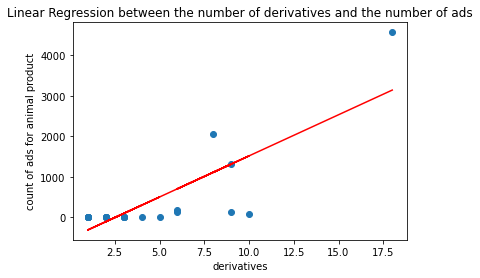

In [17]:
NEW = NEW.toPandas()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = NEW['distinct_derivatives'].values.reshape(-1, 1)
Y = NEW['count'].values
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.xlabel('derivatives')
plt.ylabel('count of ads for animal product')
plt.title('Linear Regression between the number of derivatives and the number of ads')
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Identify endangered species 

In [26]:
result = DF.filter(DF['label'] == 1).select('product')
result.show(truncate=False)

+--------------------------------------------------------------------------------------------------+
|product                                                                                           |
+--------------------------------------------------------------------------------------------------+
|10 PACK 1/2 oz. Round jig heads with barb 2/0 or 3/0 Mustad bronze hooks $5.50 - PicClick         |
|10 "WIDE EYE" Jig Head Crappie Trout Saltwater Lure Ultra Point Hook -Orange $17.15 - PicClick    |
|13 FISHING SPIN Walker 4 1/4 inch Prop Pencil Hybrid Topwater Bass Hard Lure $20.28 - PicClick    |
|1:6 HEAD SCULPT North American Gray Wolf Carved For 12" Male Action Figure Body $46.99 - PicClick |
|16X "BULLET" 8 oz Striper Ling Cod Grouper Halibut Saltwater Hook Jig Head Lures $65.00 - PicClick|
|2X WOLF HEAD Car Side Fender Rear Trunk Emblem Badge Decals ( black $12.99 - PicClick            |
|4PK BUCKTAIL JIG Squid Skirt Lure total 20 Skirts 12cm,9cm,7cm Choice of size $11.50 - Pic

In [27]:
def Filter1(x):
    for i in range(len(x)):
        for j in endangered_species:
            if x[i] in j:
                return True
            if i >= 1 and (x[i-1] + " " + x[i]) in j:
                return True
            if i >= 2 and (x[i-2] + " " + x[i-1] + " " + x[i]) in j:
                return True
    return False
def mapfunction1(x):
    for i in range(len(x)):
        for j in endangered_species:
            if x[i] in j:
                return j[0]
            if i >= 1 and (x[i-1] + " " + x[i]) in j:
                return j[0]
            if i >= 2 and (x[i-2] + " " + x[i-1] + " " + x[i]) in j:
                return j[0]
RES = result.rdd.flatMap(list).map(fingerprint2).filter(Filter1).map(mapfunction1)

In [28]:
RES = RES.map(lambda p: Row(species = p))
RES = spark.createDataFrame(RES)
RES.createOrReplaceTempView("RES")
spark.sql("select species, count(*) as count from RES group by species order by count desc").show(100)

+-------------------+-----+
|            species|count|
+-------------------+-----+
|         canis lupu| 2116|
|    struthio camelu| 1389|
|crocodylus niloticu|  778|
|  caiman latirostri|  392|
|                pan|   14|
|         chinchilla|    7|
|        brachylophu|    2|
+-------------------+-----+



In [29]:
def Filter2(x):
    for i in range(len(x)):
        for j in top:
            if x[i] in j:
                return True
            if i >= 1 and (x[i-1] + " " + x[i]) in j:
                return True
            if i >= 2 and (x[i-2] + " " + x[i-1] + " " + x[i]) in j:
                return True
    return False
def mapfunction2(x):
    for i in range(len(x)):
        for j in top:
            if x[i] in j:
                return j[0]
            if i >= 1 and (x[i-1] + " " + x[i]) in j:
                return j[0]
            if i >= 2 and (x[i-2] + " " + x[i-1] + " " + x[i]) in j:
                return j[0]
RES = result.rdd.flatMap(list).map(fingerprint2).filter(Filter2).map(mapfunction2)
RES = RES.map(lambda p: Row(species = p))
RES = spark.createDataFrame(RES)
RES.createOrReplaceTempView("RES")
spark.sql("select species, count(*) as count from RES group by species order by count desc").show()

+--------------------+-----+
|             species|count|
+--------------------+-----+
|                wolf| 7502|
|   great white shark| 6515|
|             ostrich| 5901|
|    sand tiger shark| 4704|
|      nile crocodile| 3219|
|             redfish| 2785|
|             halibut| 2686|
|         silky shark| 2245|
|       ground beetle| 2199|
|          canis lupu| 1521|
|     struthio camelu| 1181|
| crocodylus niloticu|  454|
|   caiman latirostri|  392|
|    carcharias tauru|  317|
|hippoglossus hipp...|  261|
|carcharhinus long...|  129|
|carcharhinus falc...|   94|
+--------------------+-----+



In [49]:
result = DF.filter(DF['label'] == 1).filter(DF['production_data'] != 'None').select('product', 'production_data', 'location')
result.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+-------------------+
|product                                                                                                                                                                                                                                                                         |production_data  |location           |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+-------------------+
|Francine Tint - Wolf Mother For Sale at 1stDibs | wolf tint,

In [50]:
result.count()

609

In [52]:
def Filter3(x):
    for i in range(len(x[0])):
        for j in top:
            if x[0][i] in j:
                return True
            if i >= 1 and (x[0][i-1] + " " + x[0][i]) in j:
                return True
            if i >= 2 and (x[0][i-2] + " " + x[0][i-1] + " " + x[0][i]) in j:
                return True
    return False
def mapfunction3(x):
    for i in range(len(x[0])):
        for j in top:
            if x[0][i] in j:
                return [j[0], x[1], x[2]]
            if i >= 1 and (x[0][i-1] + " " + x[0][i]) in j:
                return [j[0], x[1], x[2]]
            if i >= 2 and (x[0][i-2] + " " + x[0][i-1] + " " + x[0][i]) in j:
                return [j[0], x[1], x[2]]
RES = result.rdd.map(lambda x: [fingerprint2(x[0]), x[1], x[2]]).filter(Filter3).map(mapfunction3)
RES = RES.map(lambda p: Row(species = p[0], date = p[1], location = p[2]))
RES = spark.createDataFrame(RES)
RES.createOrReplaceTempView("RES")
spark.sql("select species, location, count(*) as count from RES group by species, location order by count desc").show()

+--------------+-----------------+-----+
|       species|         location|count|
+--------------+-----------------+-----+
|       ostrich|              USA|    6|
|       ostrich|  Bothas Hill, ZA|    3|
|       ostrich|  Los Angeles, CA|    3|
|       ostrich|    Great Britain|    3|
|       ostrich| Philadelphia, PA|    3|
|          wolf|     New York, NY|    2|
|          wolf|Bridgehampton, NY|    1|
|       ostrich|   Palm Beach, FL|    1|
|       ostrich|     Westport, CT|    1|
|       ostrich|       Forney, TX|    1|
|nile crocodile|              USA|    1|
|       ostrich|       Carmel, CA|    1|
|          wolf|       London, GB|    1|
|nile crocodile|        Paris, FR|    1|
|       ostrich|  Switzerland, CH|    1|
|       ostrich|         Rome, IT|    1|
|       ostrich|   Barrowford, GB|    1|
|nile crocodile|               FR|    1|
|       ostrich|     ZuÌrich, CH|    1|
|       ostrich|      Toronto, CA|    1|
+--------------+-----------------+-----+
only showing top

In [53]:
spark.sql("select date, location , count(*) as count from RES where species = 'ostrich' group by date, location order by count desc").show()

+--------------------+----------------+-----+
|                date|        location|count|
+--------------------+----------------+-----+
|        21st Century|             USA|    4|
|               2010-| Bothas Hill, ZA|    3|
|           2000-2009|Philadelphia, PA|    2|
|               2010-| Los Angeles, CA|    2|
|   Late 20th Century|             USA|    2|
|        21st Century|   Great Britain|    2|
|        21st Century| Switzerland, CH|    1|
|           2000-2009|      London, GB|    1|
|        21st Century|      Forney, TX|    1|
|15th Century and ...|   Great Britain|    1|
|           1990-1999|Philadelphia, PA|    1|
|               2010-|  Barrowford, GB|    1|
|    Mid-20th Century|    Westport, CT|    1|
|           1990-1999|  Palm Beach, FL|    1|
|  Early 20th Century|      Carmel, CA|    1|
|        21st Century| Los Angeles, CA|    1|
|        21st Century|    ZuÌrich, CH|    1|
|               2010-|     Toronto, CA|    1|
|           1990-1999|        Rome

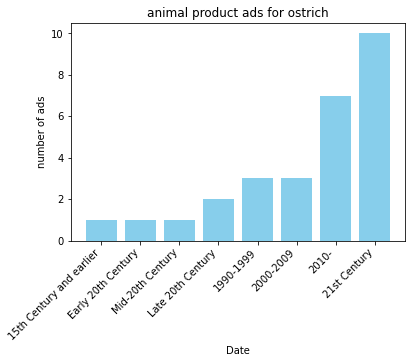

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'date': ['21st Century', '2010-', '2000-2009', '1990-1999', 'Late 20th Century', 'Mid-20th Century', 'Early 20th Century', '15th Century and earlier'],
    'count': [10, 7, 3, 3, 2, 1, 1, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)
df = df[::-1]
# Plotting
fig, ax = plt.subplots()
ax.bar(df['date'], df['count'], color='skyblue')

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('number of ads')
ax.set_title('animal product ads for ostrich')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()
